### Delhi House Price Prediction Dataset Overview:

This dataset provides crucial insights into various features of houses in Delhi, essential for predicting house prices. Here's an enhanced overview:




<img src="https://static.toiimg.com/photo/msid-100331623,width-96,height-65.cms" width=900 height=400>


#### Dataset Details:

- **Total Entries:** 5000
- **Total Columns:** 11



### Data Dictionary
| Columns Name | Description |
| --- | --- | 
| Area | Area of the house in square feet |
| BHK | Number of Bedrooms |
| Bathroom | Number of Bathrooms |
| Furnishing | Furnishing status |
| Locality | Locality of the house | 
| Parking | Number of parking available |
| Price | Price of the house in INR | 
| Status | proprety's status as in 'ready to move' or still under construction |
| Transaction | Its a new property or being re-sold | 
| Type | Type of the property |
| Per_Sqft | Price pre suare feet |

In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [4]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       251
dtype: int64

In [5]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

### Fill in Missing Values

In [6]:
# Replacing missing values in Parking, Bathroom, Furnishing and Type
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

In [7]:
# Fill in Missing Values of Per_Sqft Column 
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price'] / df['Area'])

In [8]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

### House Locality Grouping Function

This function categorizes specific house localities in Delhi into broader sectors for better analysis and interpretation.


In [9]:
# Grouping the House Locality
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    elif 'sultanpur' in locality:
        return 'Sultanpur'
    elif 'mathura' in locality :
        return 'Mathura Road'
    elif 'dilshad' in locality :
        return 'Dilshed Garden'
    elif 'greater kailash' in locality :
        return 'Greater Kailash'
    elif 'laxmi nagar' in locality :
        return 'Laxmi Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)

In [10]:
df['Locality'].value_counts()

Locality
Other                 560
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Greater Kailash        42
Vasant Kunj            35
Laxmi Nagar            34
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Dilshed Garden         30
Vasundhara Enclave     30
Sultanpur              27
Mathura Road           23
Name: count, dtype: int64

### Remove the outliers from the dataset

In [11]:
df = df[df['Price']<90000000]

In [12]:
# Define list of Continuous columns Names
continuous = ['Price', 'Per_Sqft', 'Area']

# Data Visualization 

### Distribution of Continuous Features

This function generates boxplot and histogram charts to visualize the distribution of continuous features in the dataset.


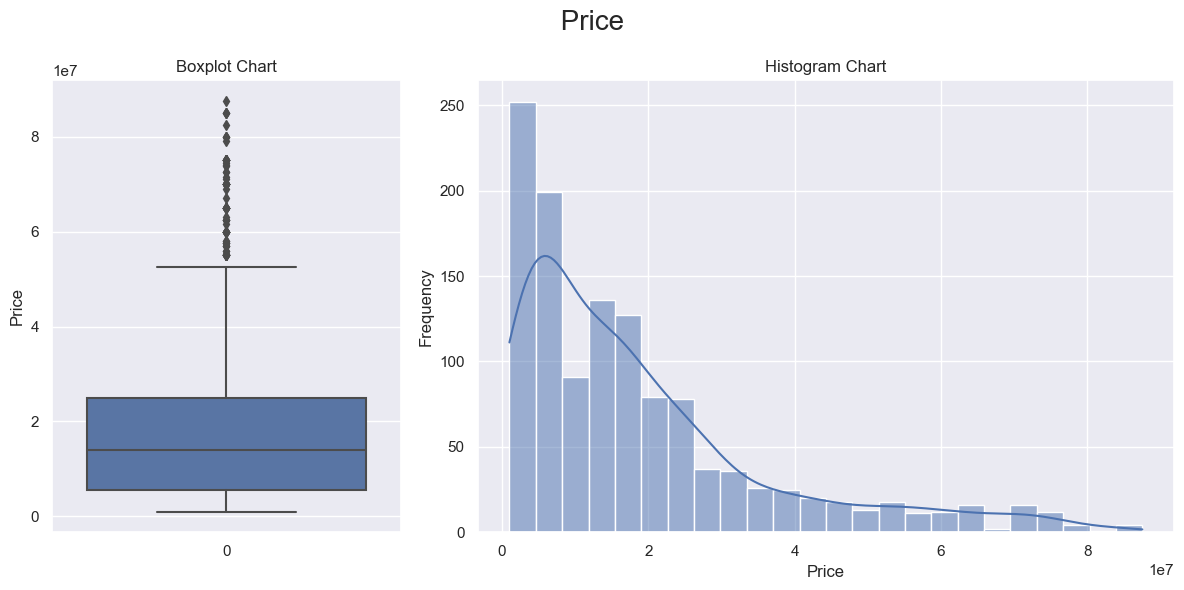

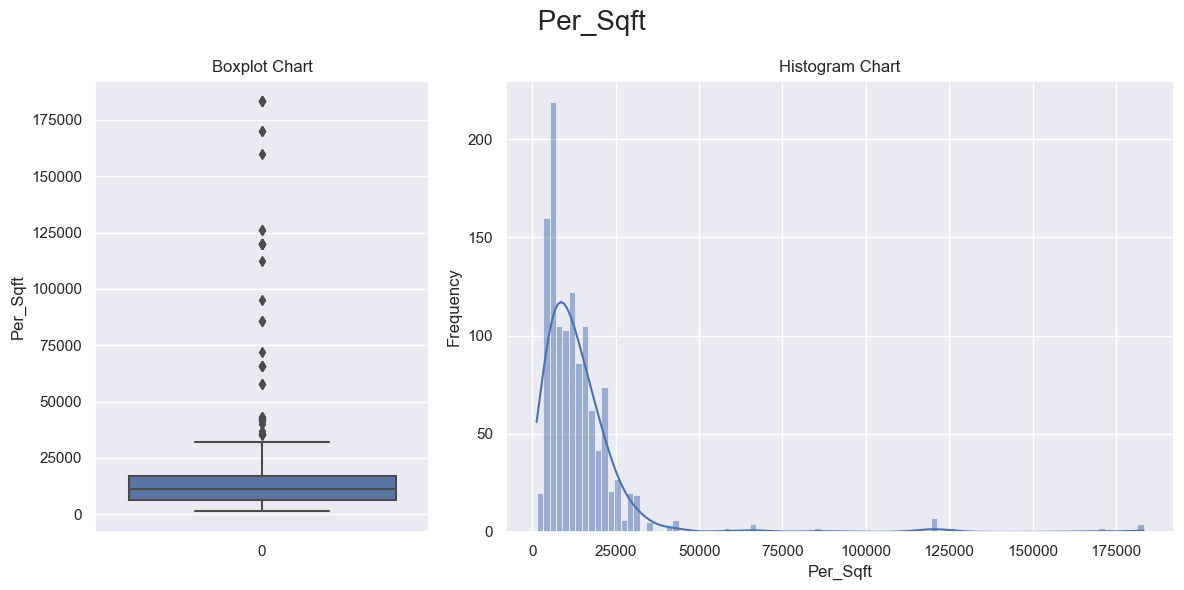

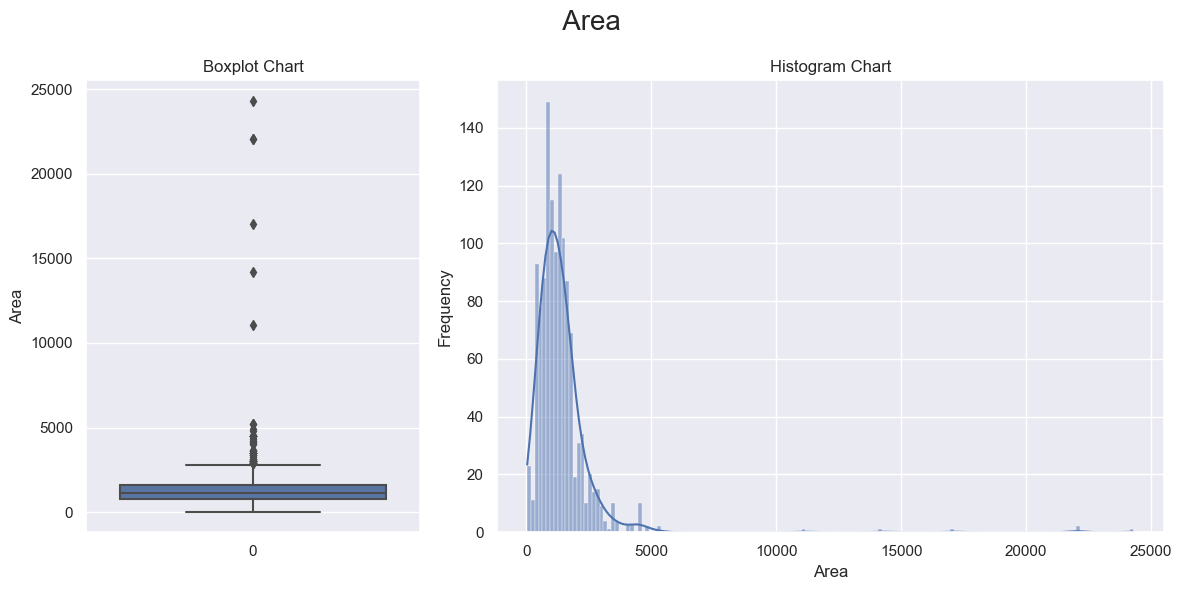

In [13]:
# Distribution of Categorical Features
def plot_continious_distribution(df, column):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios' : width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=gridspec_kw) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column)

    sns.histplot(df[column], kde=True, ax=ax[1])
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()
    
for conti in continuous:
    plot_continious_distribution(df, conti)

In [14]:
# Define list Name of Categorical columns 
categorical = ['Type', 'Status', 'Transaction', 'Furnishing']

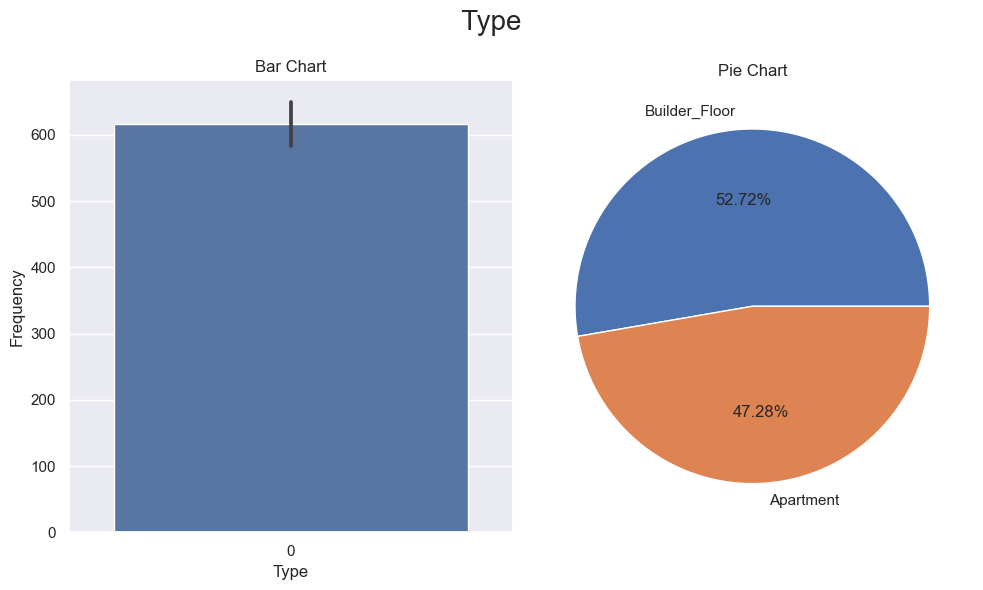

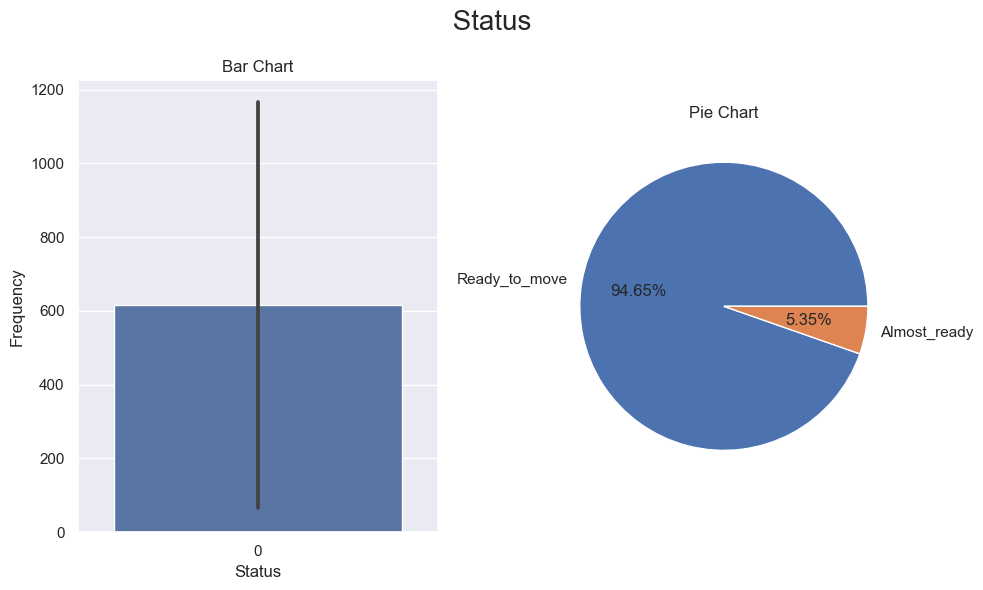

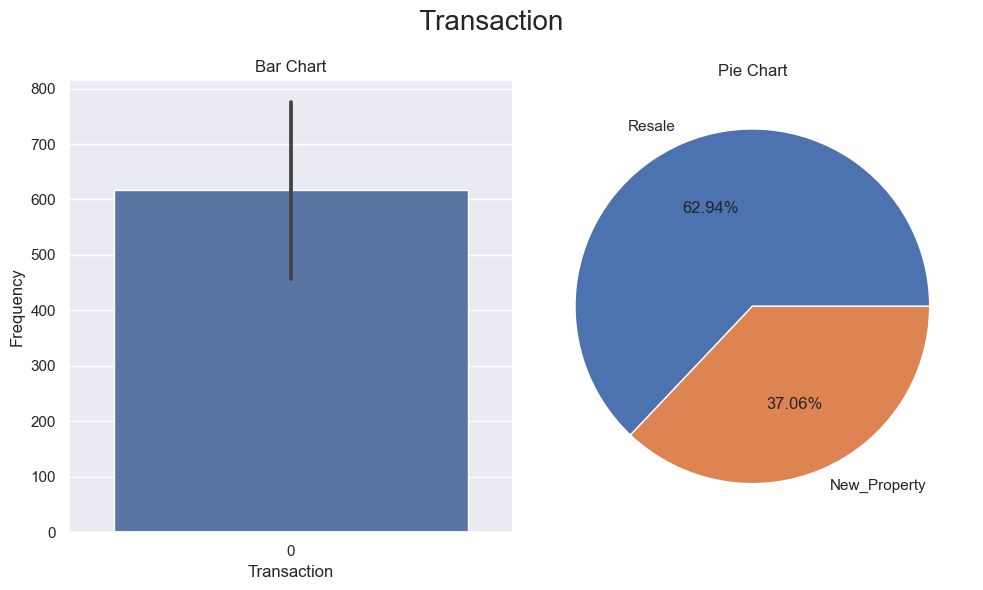

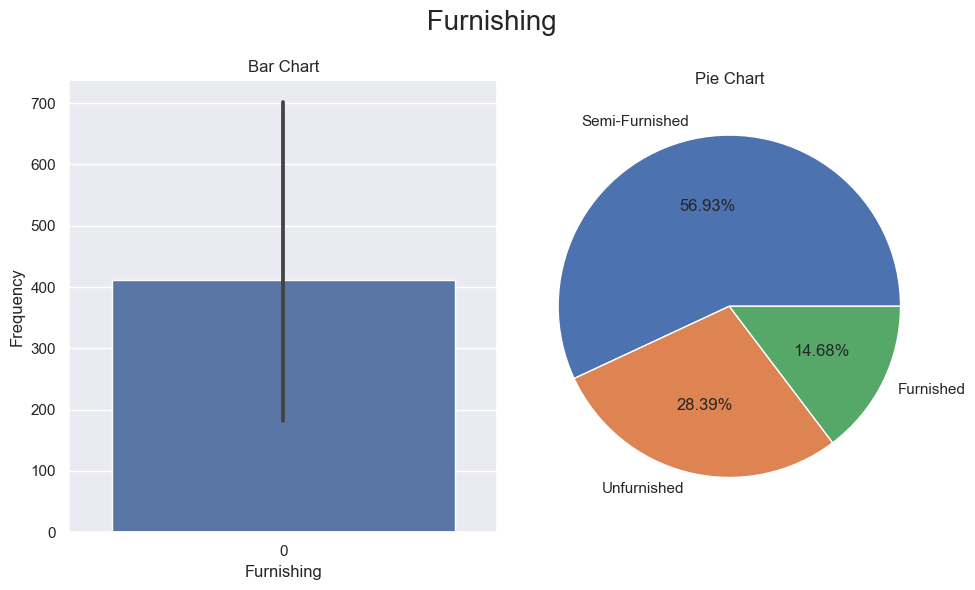

In [15]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

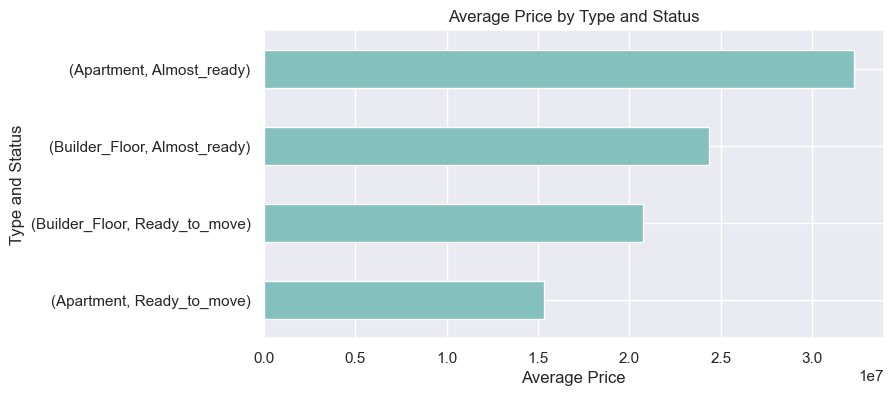

In [16]:
# Visualize the Average Price by Type and Status
plt.figure(figsize=(8,4))
act_work_study_count = df.groupby(['Type', 'Status'])['Price'].mean()
act_work_study_count.sort_values(ascending=True, inplace=True)
act_work_study_count.plot(kind='barh', color= '#84c0be')
plt.title('Average Price by Type and Status')
plt.ylabel('Type and Status')
plt.xlabel('Average Price')
plt.show()


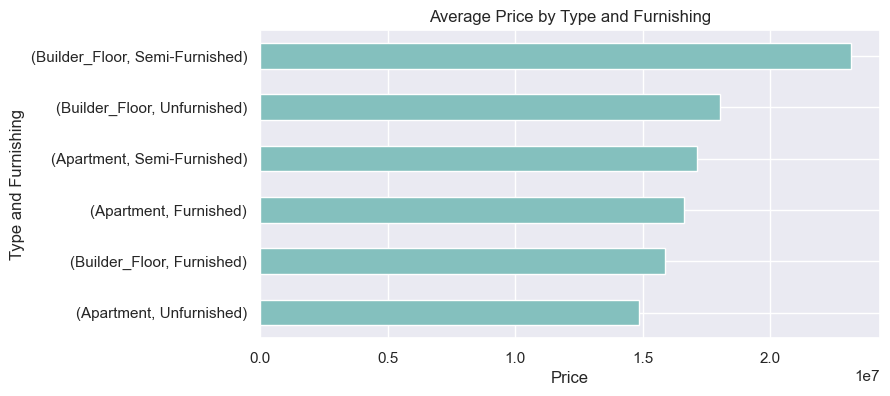

In [17]:
# Visualize the Average Price by Type and Furnishing
plt.figure(figsize=(8,4))
act_work_study_count = df.groupby(['Type', 'Furnishing'])['Price'].mean()
act_work_study_count.sort_values(ascending=True, inplace=True)
act_work_study_count.plot(kind='barh', color= '#84c0be')
plt.title('Average Price by Type and Furnishing')
plt.ylabel('Type and Furnishing')
plt.xlabel('Price')
plt.show()


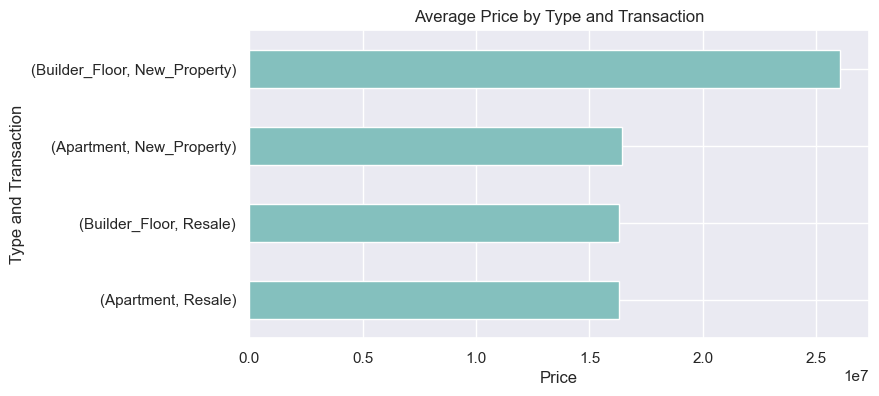

In [18]:
# Visualize the Average Price by Type and Transaction
plt.figure(figsize=(8,4))
act_work_study_count = df.groupby(['Type', 'Transaction'])['Price'].mean()
act_work_study_count.sort_values(ascending=True, inplace=True)
act_work_study_count.plot(kind='barh', color= '#84c0be')
plt.title('Average Price by Type and Transaction')
plt.ylabel('Type and Transaction')
plt.xlabel('Price')
plt.show()


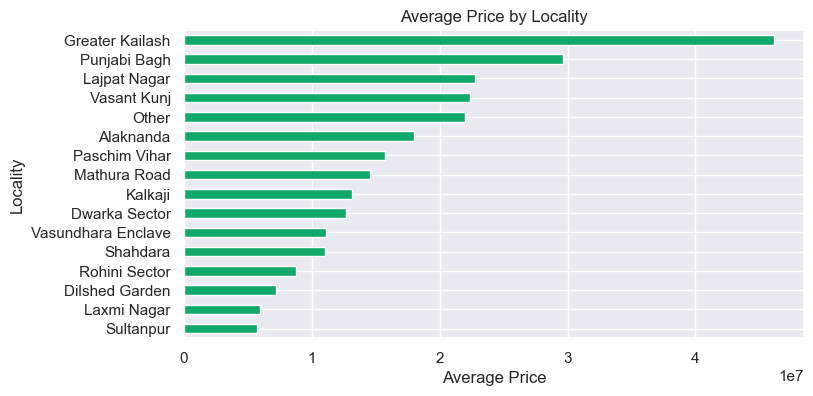

In [19]:
# Visualize the Average Price by Locality
plt.figure(figsize=(8,4))
career_avg_count = df.groupby(['Locality'])['Price'].mean()
career_avg_count.sort_values(ascending=True, inplace=True)
career_avg_count.plot(kind='barh',  color = '#13a96b')
plt.title('Average Price by Locality')
plt.xlabel('Average Price')
plt.ylabel('Locality')
plt.show()

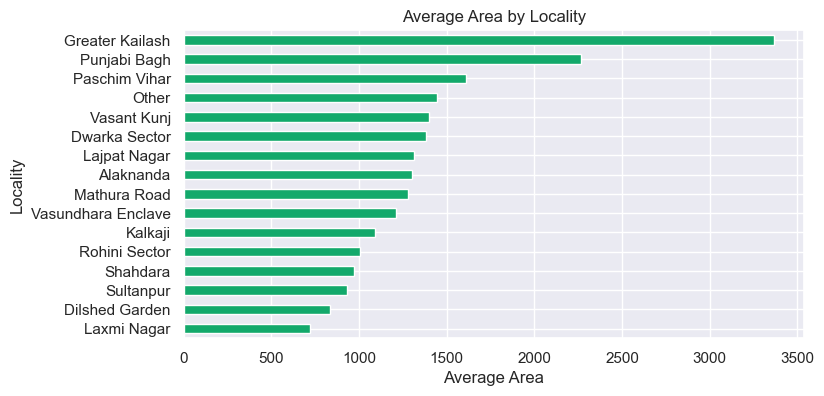

In [20]:
# Visualize the Average Area by Locality
plt.figure(figsize=(8,4))
career_avg_count = df.groupby(['Locality'])['Area'].mean()
career_avg_count.sort_values(ascending=True, inplace=True)
career_avg_count.plot(kind='barh',  color = '#13a96b')
plt.title('Average Area by Locality')
plt.xlabel('Average Area')
plt.ylabel('Locality')
plt.show()

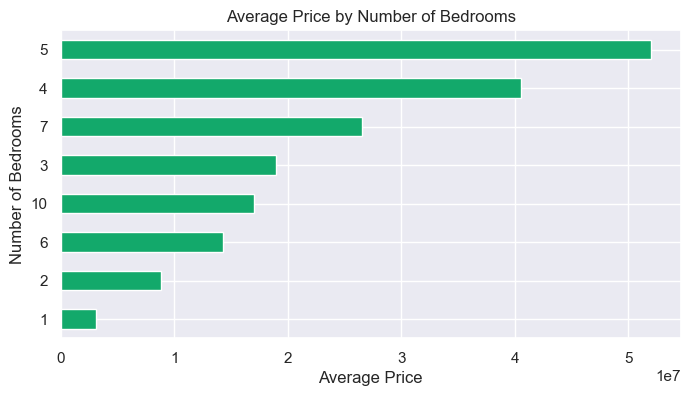

In [21]:
# Visualize the Average Price by Number of Bedrooms
plt.figure(figsize=(8,4))
career_avg_count = df.groupby(['BHK'])['Price'].mean()
career_avg_count.sort_values(ascending=True, inplace=True)
career_avg_count.plot(kind='barh',  color = '#13a96b')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Average Price')
plt.ylabel('Number of Bedrooms')
plt.show()

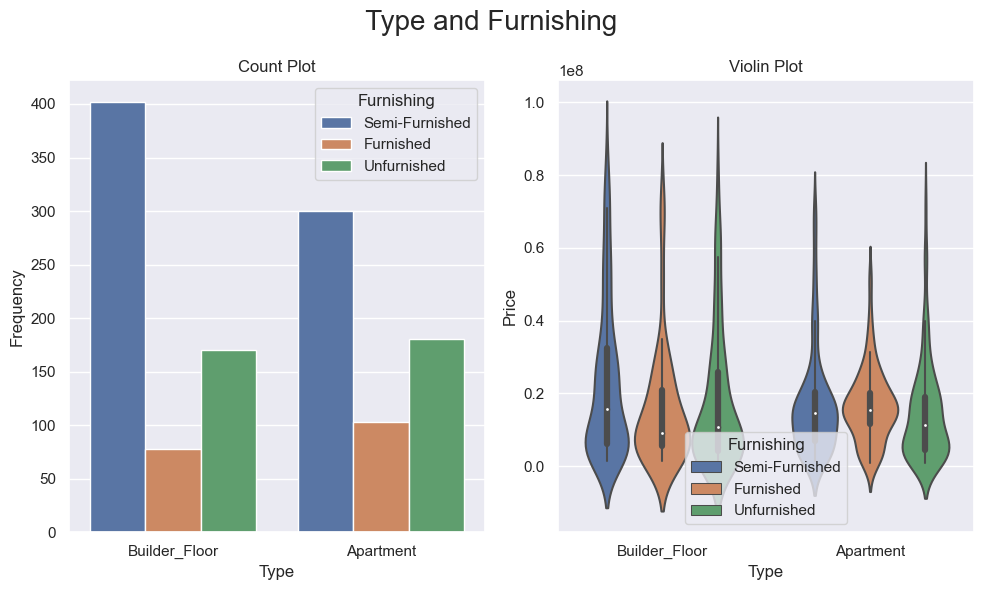

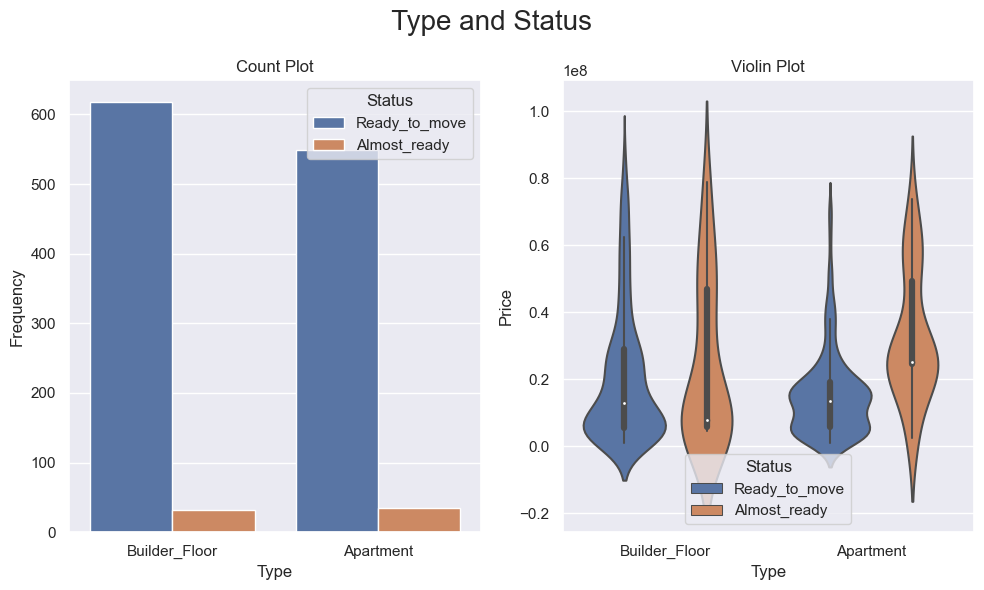

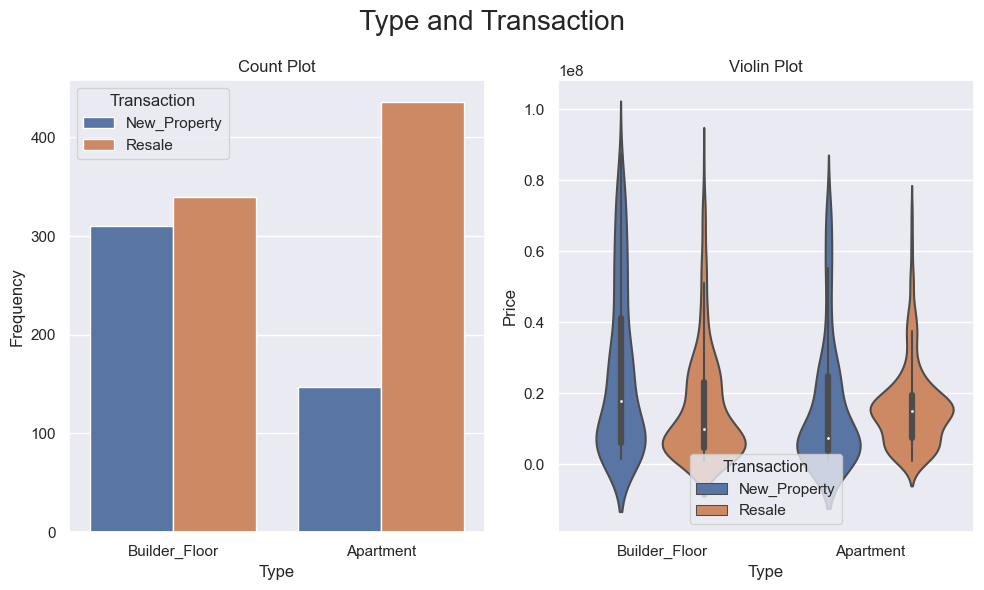

In [22]:
# Visualize Count plot and Violin Plot 

def plot_categorical(x, y, hue, data):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {x} and {hue} ', fontsize=20) 
    
    sns.countplot(x=x, hue=hue, data=data, ax=ax[0])
    ax[0].set_title('Count Plot')
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(x)
    
    sns.violinplot(x=x, y=y, hue=hue, data=data, ax=ax[1])
    ax[1].set_title('Violin Plot')
    ax[1].set_xlabel(x)
    ax[1].set_ylabel(y)
    ax[1].legend(loc='lower center', title=hue)
    
    plt.tight_layout()
    plt.show()

# Apply plot_categorical Function on Some Columns
plot_categorical(x='Type', y='Price', hue='Furnishing', data=df)
plot_categorical(x='Type', y='Price', hue='Status', data=df)
plot_categorical(x='Type', y='Price', hue='Transaction', data=df)

## Data Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder
le = LabelEncoder()
# Initialize StandardScaler
stc = StandardScaler()

# Columns to be label encoded
le_cols = ['Type', 'Transaction', 'Status']
# Columns to be Standarded
stc_cols = ['Per_Sqft', 'Area', 'Price']

# Apply label encoding to the selected columns
for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=['Furnishing', 'Locality'])

In [24]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Price'], axis=1)
y = df['Price']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Training and Evaluating Different Models
### Mean Absolute Error (MAE)
MAE measures the average absolute difference between the predicted and actual values. It gives an idea of the model's accuracy.



### Mean Squared Error (MSE)
MSE measures the average squared difference between the predicted and actual values. It penalizes large errors more than MAE.



### Root Mean Squared Error (RMSE)
RMSE is the square root of the MSE. It provides an interpretable measure in the same units as the target variable.



### R-squared (R2 Score)
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit.



### Adjusted R-squared (Adjusted R2 Score)
Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It penalizes the addition of unnecessary predictors.



In [25]:
#Importing the Libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [26]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGB Regressor', XGBRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

Gradient Boosting: Mean Squared Error = 0.113, R-squared = 0.888
K-Nearest Neighbors: Mean Squared Error = 0.177, R-squared = 0.824
Decision Tree: Mean Squared Error = 0.264, R-squared = 0.737
Random Forest: Mean Squared Error = 0.11, R-squared = 0.891
XGB Regressor: Mean Squared Error = 0.123, R-squared = 0.878


## Hyperparameter Tuning using GridSearchCV



In [27]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

r2 = r2_score(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)

print(f"Random Forest : Mean Squared Error = {round(mse, 3)}, R-Squared = {round(r2, 3)}")

Random Forest : Mean Squared Error = 0.113, R-Squared = 0.887


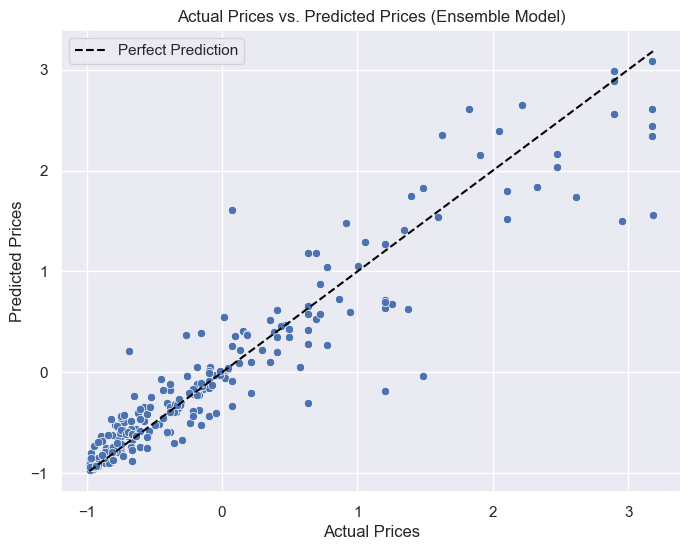

In [28]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Ensemble Model)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
rf_best_params = grid_search.best_params_

# Retrain the model with the best parameters
rf_model_best = RandomForestRegressor(random_state=42, **rf_best_params)
rf_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(x_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [31]:
# Evaluate the tuned Random Forest model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {rf_best_params}')
print(f'Mean Squared Error (Tuned Random Forest): {round(mse_best, 3)}')
print(f'R-squared (Tuned Random Forest): {round(r2_best, 3)}')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (Tuned Random Forest): 0.104
R-squared (Tuned Random Forest): 0.896


In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 1]
}

# Initialize the XGB Regressor
xgb_best = XGBRegressor()
# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_best, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
xgb_best_params = grid_search.best_params_

# Retrain the model with the best parameters
xgb_model_best = XGBRegressor(**xgb_best_params)
xgb_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = xgb_model_best.predict(x_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


In [33]:
# Evaluate the tuned XGB model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {xgb_best_params}')
print(f'Mean Squared Error (Tuned XGB): {round(mse_best, 3)}')
print(f'R-squared (Tuned XGB): {round(r2_best, 3)}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.8}
Mean Squared Error (Tuned XGB): 0.113
R-squared (Tuned XGB): 0.887


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [80,79],
    'learning_rate': [0.102, 0.102006, 0.1020132],
    'max_depth': [3, 4]
}

# Initialize the Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()
# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')


# Fit the grid search to the data
grid_search_gb.fit(x_train, y_train)

# Get the best parameters
gb_best_params = grid_search_gb.best_params_

# Retrain the model with the best parameters
gb_model_best = GradientBoostingRegressor(**gb_best_params, random_state=0)
gb_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = gb_model_best.predict(x_test)

In [35]:
# Evaluate the tuned Gradient Boosting model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {gb_best_params}')
print(f'Mean Squared Error (Tuned Gradient Boosting): {round(mse_best, 3)}')
print(f'R-squared (Tuned Gradient Boosting): {round(r2_best, 3)}')

Best Parameters: {'learning_rate': 0.102006, 'max_depth': 3, 'n_estimators': 79}
Mean Squared Error (Tuned Gradient Boosting): 0.115
R-squared (Tuned Gradient Boosting): 0.885


### Ensemble Model Training and Evaluation

The provided code snippet trains an ensemble model using a VotingRegressor, which combines predictions from three individual models: GradientBoostingRegressor, XGBRegressor, and RandomForestRegressor. After training the ensemble model, it makes predictions on the test data and evaluates its performance using Mean Squared Error (MSE) and R-squared metrics.


In [36]:
model1 = GradientBoostingRegressor(random_state=42)
model2 = XGBRegressor(**xgb_best_params)
model3 = RandomForestRegressor(random_state=42)
# Create Ensemble Model
ensemble_model = VotingRegressor(estimators=[ ('gbt', model1), ('xgb', model2), ('rf', model3)])

# Model Training
ensemble_model.fit(x_train, y_train)

# Predict y_test  Values 
y_best_pred = ensemble_model.predict(x_test)

# Evaluate Model Accuracy 
mse = mean_squared_error(y_test, y_best_pred)
r2 = r2_score(y_test, y_best_pred)
print(f'Ensemble Model : Mean Squared Error = {round(mse,3)}\n R-squared = {round(r2, 3)}')


Ensemble Model : Mean Squared Error = 0.104
 R-squared = 0.897


### Visualization of Predicted Prices Against Actual Prices

The provided scatter plot visualizes the predicted house prices against the actual house prices using the ensemble model. Each point represents a data point from the test set, with the x-coordinate indicating the actual price and the y-coordinate indicating the predicted price. The dashed line represents perfect predictions, where actual prices equal predicted prices.


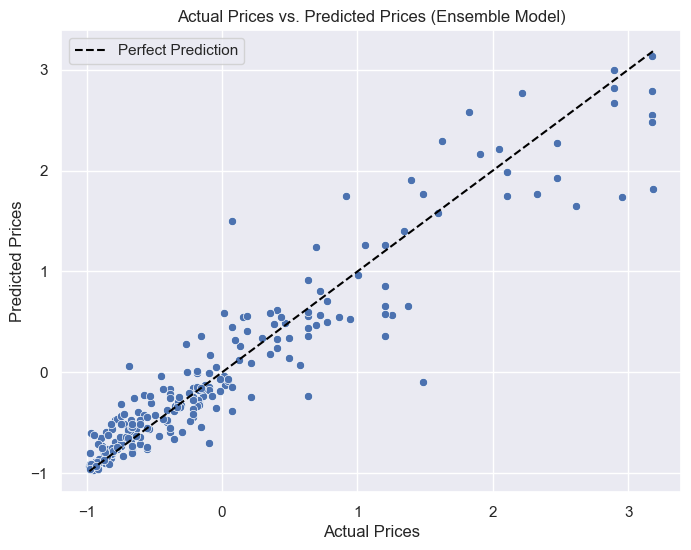

In [37]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_best_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Ensemble Model)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

# Conclusion:

The ensemble model comprising Gradient Boosting Regressor, XGBoost Regressor, and Random Forest Regressor showcases exceptional performance, achieving an impressive R-squared value of approximately 0.9. This signifies the model's ability to accurately explain about 90% of the variability observed in house prices. Consequently, the ensemble model demonstrates robust predictive capabilities, instilling confidence in its reliability for accurately predicting house prices within the dataset.
For any questions or feedback, please feel free to reach out to the project maintainer at [ mahditajdari09@gmail.com , huseinmohammadi83@gmail.com ]
### Developed by Hosein Mohammadi and Mahdi Tajdari